## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

In [ ]:
# Checking the number of mice.
combined_data.count()

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#combined_data["Mouse ID"].value_counts()
combined_group = combined_data.groupby(["Mouse ID","Timepoint"])
combined_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mice = combined_data.drop_duplicates(["Mouse ID"])


In [6]:
# Checking the number of mice in the clean DataFrame.
drop_mice.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sum_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
# This method is the most straighforward, creating multiple series and putting them all together at the end.
sum_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sum_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
# This method produces everything in a single groupby function
sum_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

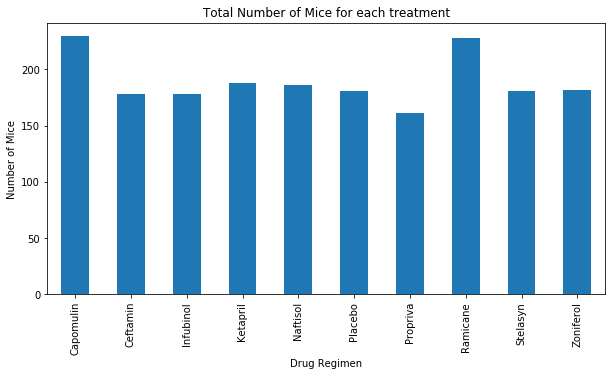

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_regimen = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

drug_regimen.plot(kind="bar", figsize=(10,5))
plt.title("Total Number of Mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


plt.show()

In [19]:
drug_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

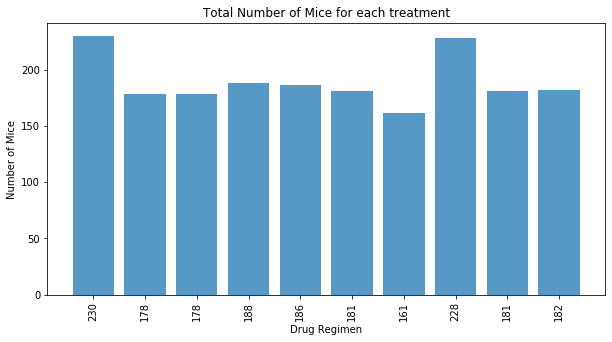

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10, 5))

plt.bar(x_axis, users, alpha=0.75, align="center")
plt.xticks(tick_locations, users,rotation="vertical")
plt.title("Total Number of Mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_data.groupby(["Mouse ID", "Sex"])
gender_group.count()


#labels = ["Male", "Female"]
#sizes = [220, 95, 80, 100]
#colors = ["red", "orange", "lightcoral", "lightskyblue"]
#explode = (0.1, 0, 0, 0)

#gender_group.pie(sizes, explode=explode, labels=labels, colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)




,,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,Sex,,,,,,
a203,Female,10,10,10,10,10,10
a251,Female,10,10,10,10,10,10
a262,Female,10,10,10,10,10,10
a275,Female,10,10,10,10,10,10
a366,Female,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,Female,3,3,3,3,3,3
z578,Male,10,10,10,10,10,10
z581,Female,10,10,10,10,10,10


In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
infubinol = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
ceftamin = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]
capomulin.head()
# Start by getting the last (greatest) timepoint for each mouse
timepoint_last = combined_data.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_timepoint = pd.merge(combined_data, timepoint_last, on="Mouse ID")
combined_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_outliers = combined_timepoint["Tumor Volume (mm3)"]

quartiles = tumor_outliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


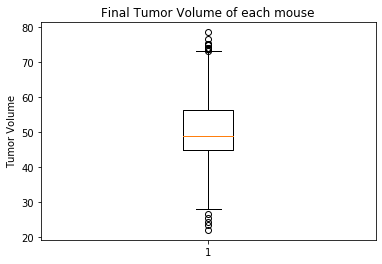

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of each mouse")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_outliers)
plt.show()

## Line and Scatter Plots

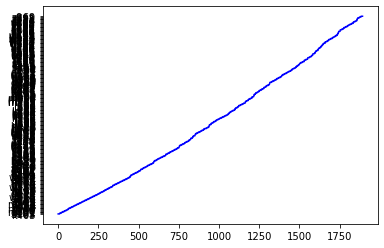

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin1 = tumor_outliers.keys()
line_plot = plt.plot(capomulin1, combined_data["Mouse ID"], color="blue")

Text(0, 0.5, 'Tumor Volume')

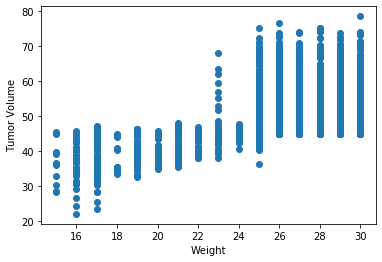

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = combined_timepoint["Weight (g)"]
avg_tumor = combined_timepoint["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, avg_tumor)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
